# Data Analysis

In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip

--2023-12-02 18:21:29--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip.1’

ml-100k.zip.1       100%[===================>]   4.70M  8.96MB/s    in 0.5s    

2023-12-02 18:21:30 (8.96 MB/s) - ‘ml-100k.zip.1’ saved [4924029/4924029]

Archive:  ml-100k.zip
replace ml-100k/allbut.pl? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml

In [ ]:
# !pip install nxviz

In [ ]:
# import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
import networkx as nx
import nxviz as nv
from wordcloud import WordCloud
from matplotlib import cm
import warnings

random.seed(42)

warnings.filterwarnings('ignore')
%matplotlib inline

base = "/content/ml-100k/"

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw = True)

/usr/local/lib/python3.10/dist-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [ ]:
import torch
import random

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed(42)

Loading and displaying Rating and User data

In [ ]:
# Load rating and user data
ratings_data = pd.read_csv(base + 'u.data', sep = '\t', header = None)
user_data = pd.read_csv(base + 'u.user', sep = '|', header = None)
ratings_data.columns = ['user_id', 'item_id', 'rating', 'timestamp']
user_data.columns = ['user_id', 'age', 'gender', 'occupation', 'zip code']
display_side_by_side(ratings_data.head(10), user_data.head(10))

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


Loading and displaying Movies data

In [ ]:
# Load movie data
item = pd.read_csv(base + 'u.item', sep = '|', header = None, encoding='latin-1')
item.columns = ['item_id', 'item_title', 'release_date', 'video_release_date',
              'IMDb_URL', 'Unknown', 'Action', 'Adventure', 'Animation',
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']
item.head(10)

,item_id,item_title,release_date,video_release_date,IMDb_URL,Unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
n_ratings = len(ratings_data)
n_movies = len(ratings_data['item_id'].unique())
n_users = len(ratings_data['user_id'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movies: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100000
Number of unique movies: 1682
Number of unique users: 943
Average ratings per user: 106.04
Average ratings per movie: 59.45


Displaying WordCloud

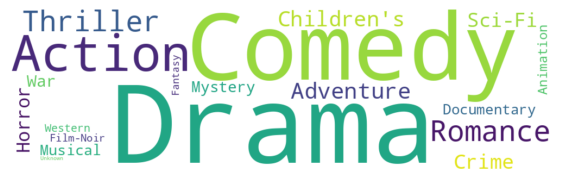

In [ ]:
generes_list = ['Unknown', 'Action', 'Adventure', 'Animation',
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']
geners_freq_data = item[generes_list]
result = np.sum(geners_freq_data, axis=0)
fig = plt.figure(1, figsize=(7,5))

# Generate a word cloud image
wordcloud = WordCloud(width=1000, height=300, max_font_size=200,
                      background_color='white').generate_from_frequencies(result)

# Display the Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Calculating and displaying number of each genre met in the Movies data

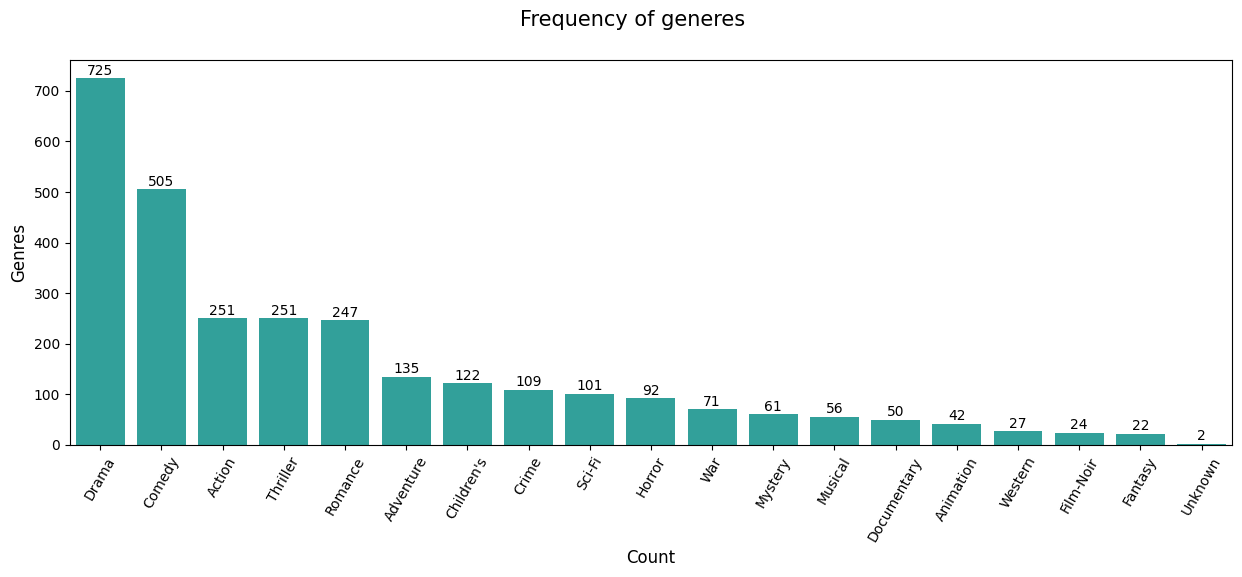

In [ ]:
# Frequency of generes
fig = plt.figure(1, figsize=(15,5))

genere_counts = item.loc[:,generes_list].sum().sort_values(ascending=False)
ax = sns.barplot(x = genere_counts.index, y = genere_counts.values, color = 'lightseagreen')
plt.xticks(rotation=60)

for i, index in enumerate(genere_counts.index):
    ax.text(i, genere_counts[index] + 7, genere_counts[index],
            color='black', ha='center')

plt.suptitle('Frequency of generes', fontsize=15)
plt.xlabel('Count')
plt.ylabel('Genres')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=12)
plt.show()

Calculating correlation matrix between different generes

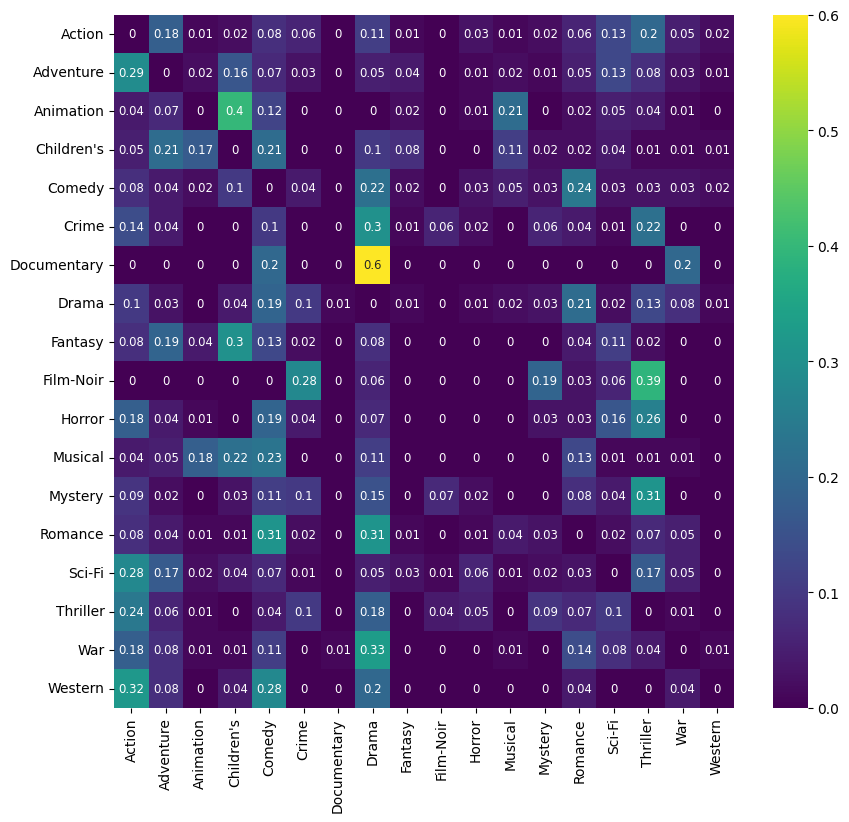

In [ ]:
genres = item.iloc[:, 5:]
genres.index = item['item_id']

# Construct genre graph
# Create co-occurence matrix
coocc = genres.T.dot(genres)
np.fill_diagonal(coocc.values, 0)
frac_coocc = np.round(coocc / coocc.sum(axis = 1)[:, None], decimals = 2)
frac_coocc = frac_coocc.drop('Unknown', axis = 0)
frac_coocc = frac_coocc.drop('Unknown', axis = 1)

# Build corresponding heatmap
plt.figure(figsize = (10, 9))
sns.heatmap(frac_coocc, annot=True, cmap='viridis', fmt="g", annot_kws={"fontsize":"small"})
plt.show()

Graph of correlations between each genere

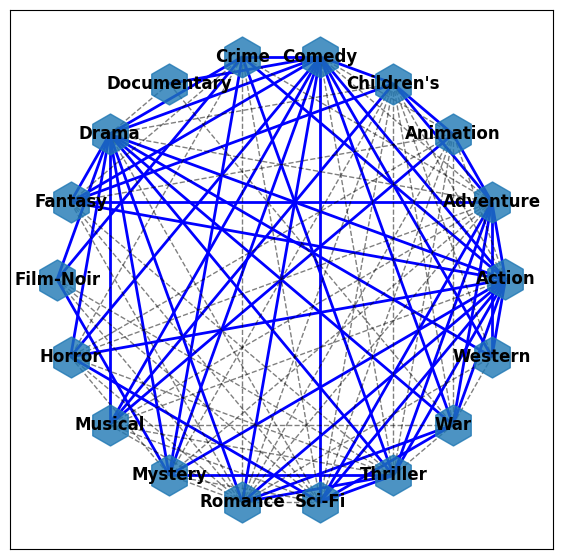

In [ ]:
# Build graph
plt.figure(figsize = (7, 7))
G = nx.from_pandas_adjacency(frac_coocc)
pos = nx.circular_layout(G)
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] > frac_coocc.values.mean()]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <= frac_coocc.values.mean()]

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=870, alpha = 0.8, node_shape = 'h')
# Labels
nx.draw_networkx_labels(G, pos, font_size = 12, font_family='sans-serif', font_weight = 'bold')

# Edges
nx.draw_networkx_edges(G, pos, edgelist = elarge, width = 2, edge_color = 'b')
nx.draw_networkx_edges(G, pos, edgelist = esmall, width = 1, alpha = 0.5, edge_color='black', style='dashed')

plt.show()

Number of different ratings

In [ ]:
print("Rating Distribution:")
rates = []
for rate in ratings_data.groupby(['rating'])['rating']:
    a, b = rate
    print(f'{b.count()} films with rating {a}')
    rates.append(b.count())

Rating Distribution:
6110 films with rating 1
11370 films with rating 2
27145 films with rating 3
34174 films with rating 4
21201 films with rating 5


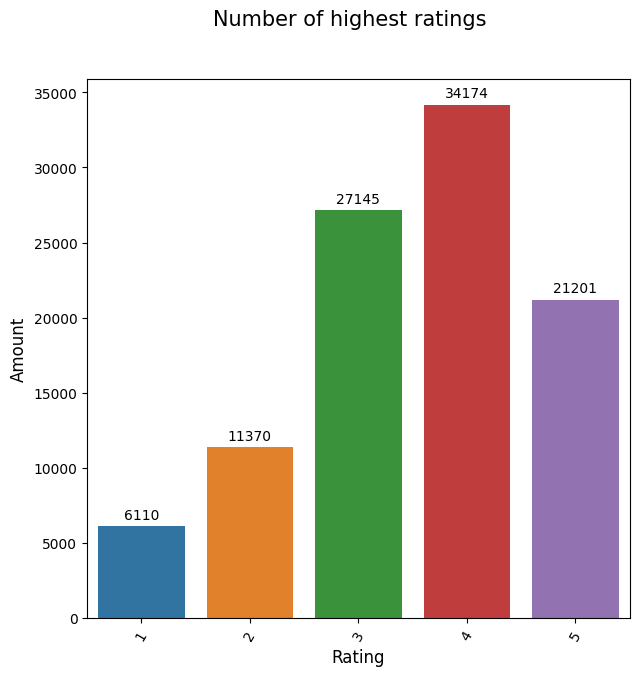

In [ ]:
plt.figure(figsize = (7, 7))
ax = sns.barplot(x = list(range(1, 6)), y = rates)
plt.xticks(rotation=60)

for i, index in enumerate(rates):
    ax.text(i, index + 500, index,
            color='black', ha='center')

plt.suptitle('Number of highest ratings', fontsize=15)
plt.xlabel('Rating')
plt.ylabel('Amount')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=12)
plt.show()

# Reference:
[1] - F. M. Harper and J. A. Konstan, “The MovieLens datasets: History and context,” ACM Trans. Interact. Intell. Syst., vol. 5, no. 4, pp. 1–19, 2016. http://dx.doi.org/10.1145/2827872

[2] - F. M. Harper and J. A. Konstan, “The MovieLens datasets: History and context,” ACM Trans. Interact. Intell. Syst., vol. 5, no. 4, pp. 1–19, 2016.

[3] - R. Vidiyala, “How to build a movie recommendation system,” Towards Data Science, 02-Oct-2020. [Online]. Available: https://towardsdatascience.com/how-to-build-a-movie-recommendation-system-67e321339109. [Accessed: 03-Dec-2023].

[4] - P. Aher, “Evaluation metrics for recommendation systems — an overview,” Towards Data Science, 09-Aug-2023. [Online]. Available: https://towardsdatascience.com/evaluation-metrics-for-recommendation-systems-an-overview-71290690ecba. [Accessed: 03-Dec-2023].

[5] - “Recommendation system in python,” GeeksforGeeks, 18-Jul-2021. [Online]. Available: https://www.geeksforgeeks.org/recommendation-system-in-python/. [Accessed: 03-Dec-2023].